In [1]:
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test) 

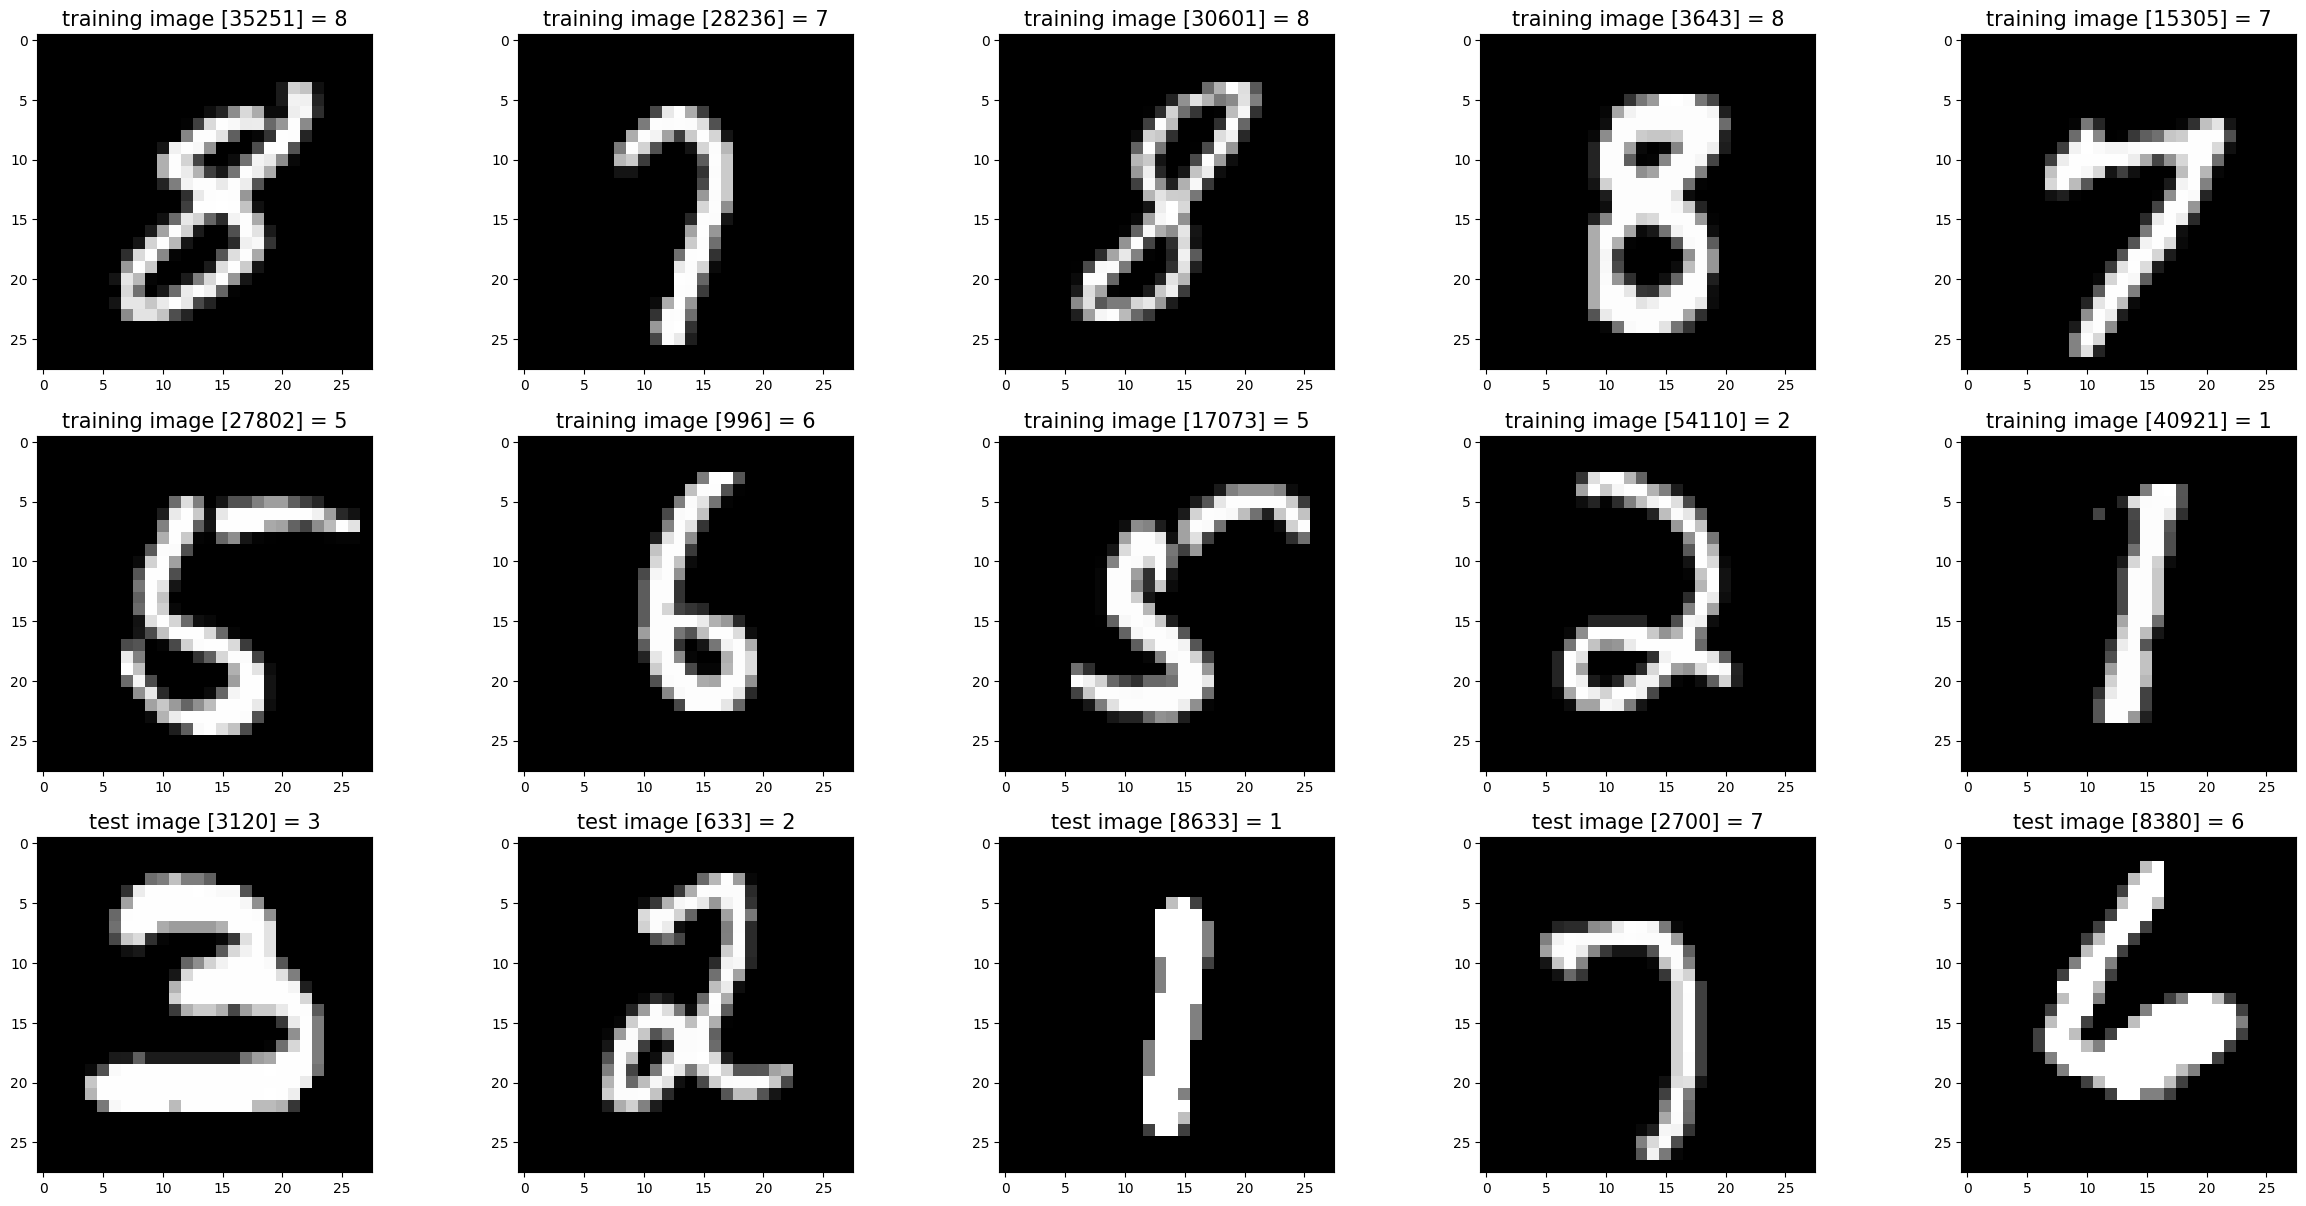

In [2]:
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = ''
training_images_filepath = join(input_path, 'data/train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'data/train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 'data/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 'data/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [4]:
x_train

[[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0], dtype=uint8),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0], dtype=uint8),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0], dtype=uint8),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0], dtype=uint8),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0], dtype=uint8),
  array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0,   0], dtype=uint8),
  array([  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
         253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
           0,   0], dtype=uint8),
  array([  0,   0,   0,   0,   0,   0,   0,  49, 23

In [8]:
X_train = np.array(x_train)
X_test = np.array(x_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)

X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [9]:
%matplotlib inline
import importlib
import nn
importlib.reload(nn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nn import NeuralNetwork
from sklearn.metrics import accuracy_score, f1_score

In [18]:
input_size = X_train.shape[1]
output_size = np.unique(Y_train).shape[0]

nn = NeuralNetwork(X_train, Y_train, [input_size, 32, 32, output_size],
                         activation_fun='sigmoid', output_activation='softmax', loss_fun='crossentropy')

nn.train(epochs=int(400), learning_rate=0.001, mini_batch=True, batch_size=1000,
                             optimization='rmsprop', momentum=0.7, stop_condition=0, report_interval=10)
nn.train(epochs=int(100), learning_rate=0.0001, mini_batch=True, batch_size=1000,
                             optimization='rmsprop', momentum=0.7, stop_condition=0, report_interval=10)

Starting loss: 2.46


Training: 100%|██████████████████████████████████████████████████████████████████████████| 400/400 [04:41<00:00] , Loss:  Current: 0.1374,Best: 0.1271



Training complete. Final loss: 0.1271
Starting loss: 0.14


Training: 100%|██████████████████████████████████████████████████████████████████████████| 100/100 [01:08<00:00] , Loss:  Current: 0.1006,Best: 0.1006


Training complete. Final loss: 0.1006


Accuracy:  0.9385
F1 Score:  0.9377596539776574


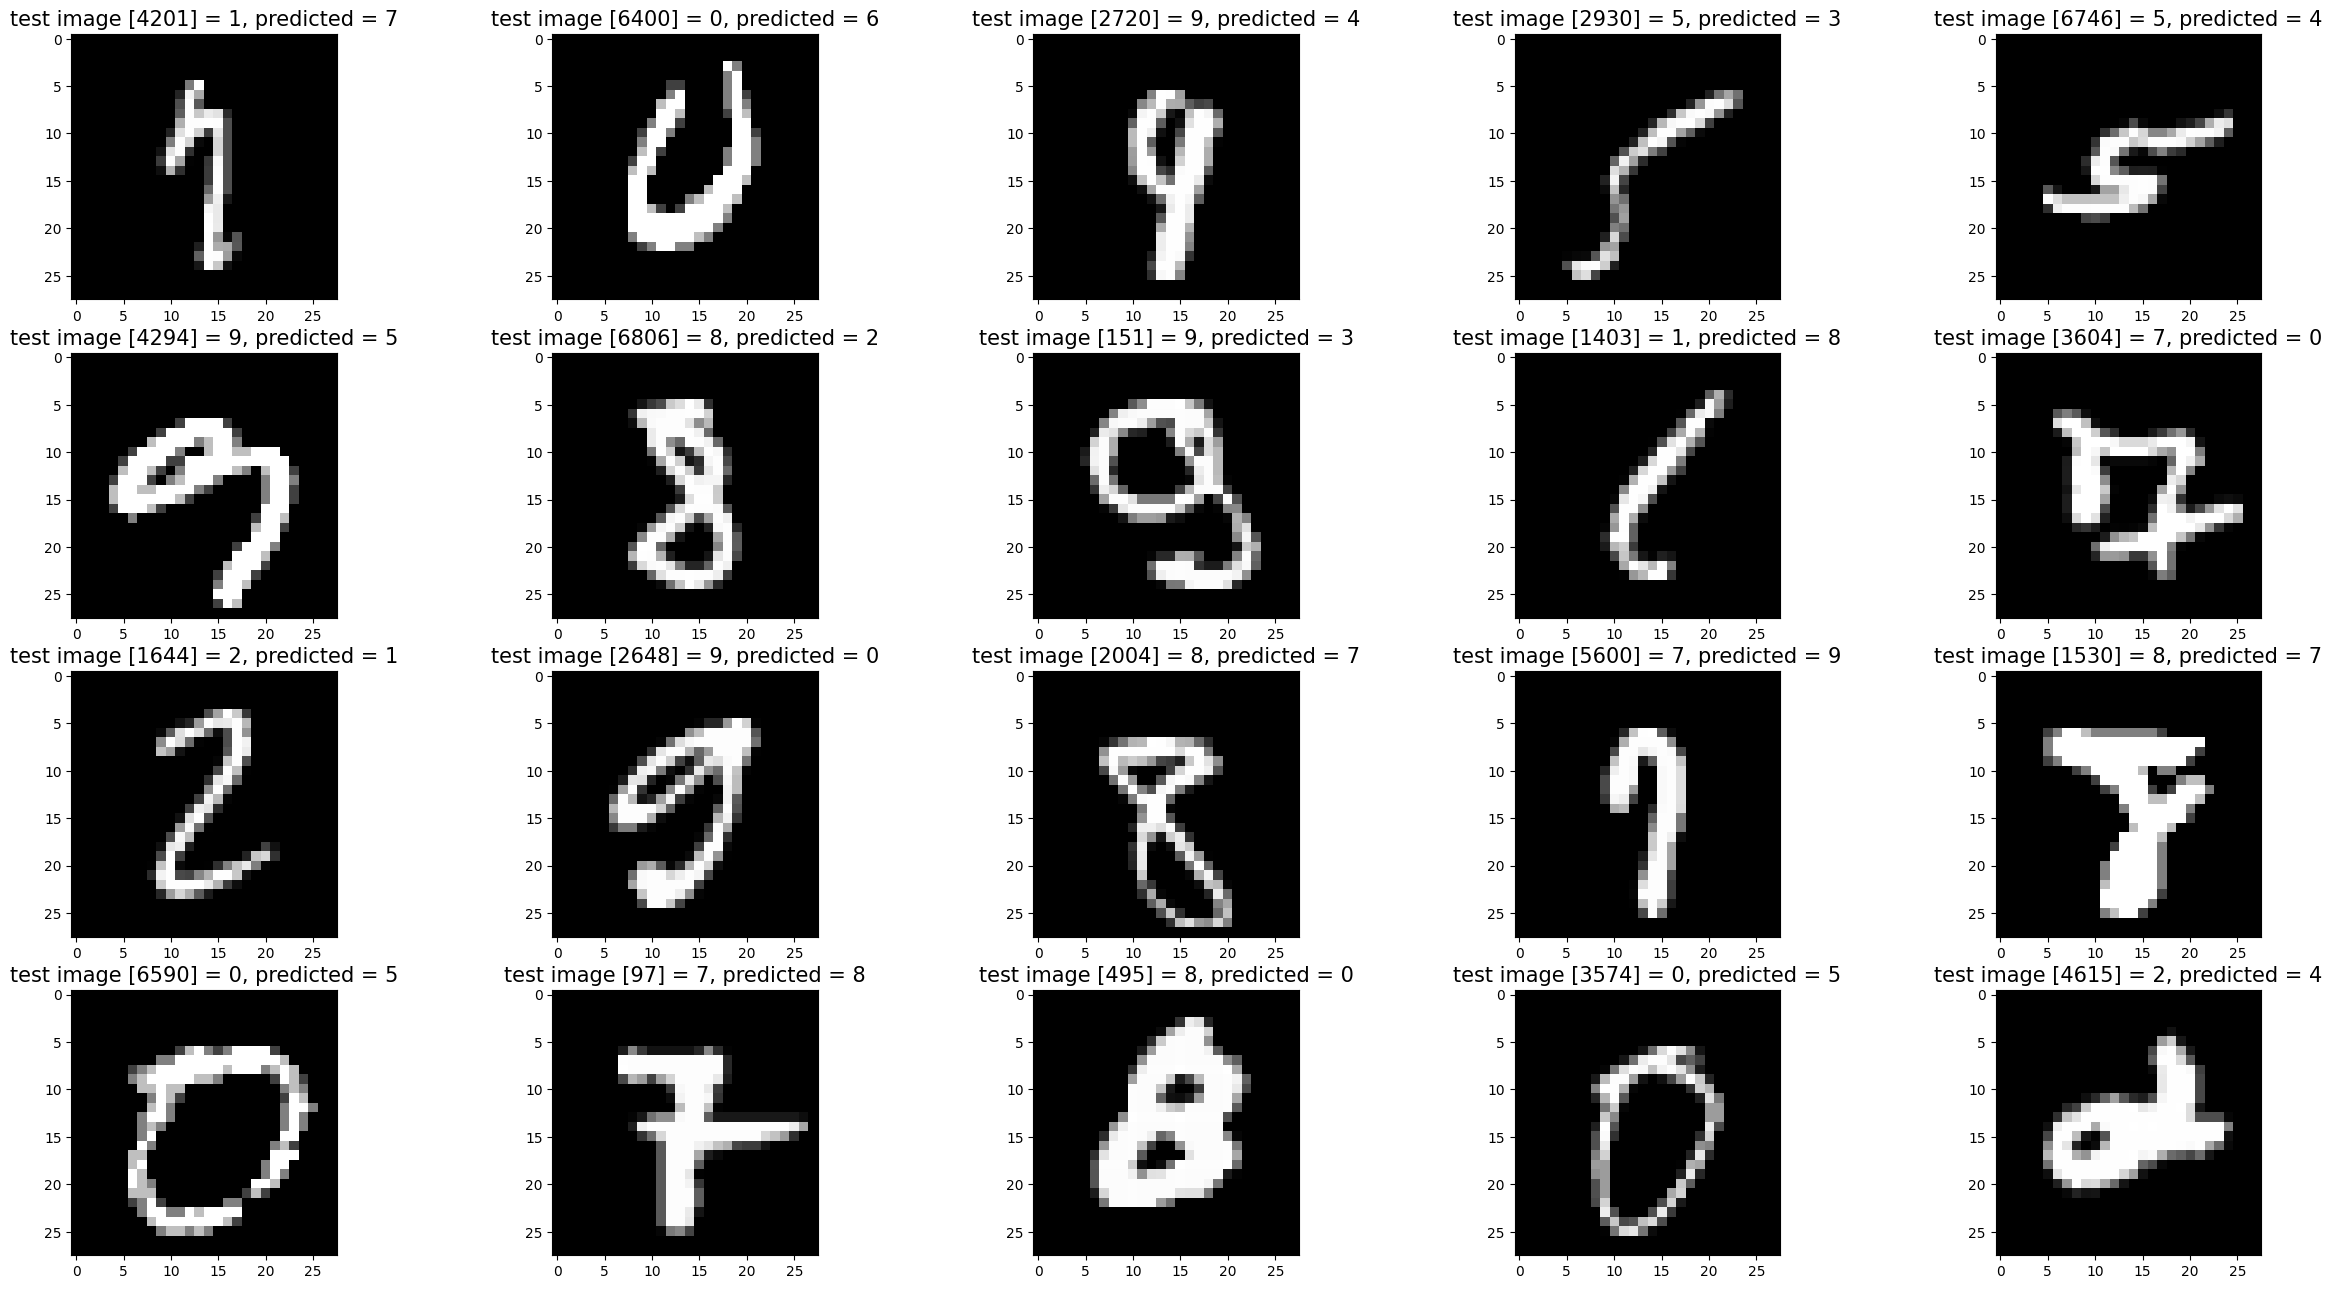

In [19]:
y_pred = nn.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(Y_test, y_pred_class)
print('Accuracy: ', accuracy)
f1 = f1_score(Y_test, y_pred_class, average='macro')
print('F1 Score: ', f1)

# # Show some random test images with their predicted labels
# images_2_show = []
# titles_2_show = []
# for i in range(0, 20):
#     r = random.randint(1, 10000)
#     images_2_show.append(x_test[r])
#     titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]) + ', predicted = ' + str(y_pred_class[r]))

# show_images(images_2_show, titles_2_show)
# plt.show()

# show some random misclassified test images
images_2_show = []
titles_2_show = []
missclassified = np.where(y_pred_class != Y_test)[0]
for i in range(0, 20):
    r = random.choice(missclassified)
    images_2_show.append(x_test[r])
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]) + ', predicted = ' + str(y_pred_class[r]))
        
show_images(images_2_show, titles_2_show)
plt.show()

